In [9]:
import cucim
import os
import pandas as pd
import numpy as np
from monai.data import WSIReader

## Setup and utils

In [2]:
root_path = "/tmp/datasets"
image_id = "0005f7aaab2800f6170c399693a96917"
wsi_file =  os.path.join(root_path, f"train_images/{image_id}.tiff")
mask_file =  os.path.join(root_path, f"train_images/{image_id}_mask.tiff")
train_csv = os.path.join(root_path, "train.csv")

In [3]:
from matplotlib import pyplot as plt
def visualize(image, dpi=80.0):
    height, width, _ = image.shape
    plt.figure(figsize=(width / dpi, height / dpi))
    plt.axis('off')
    plt.imshow(image)

## Explore Metadata

In [36]:
df = pd.read_csv(train_csv)
df.head(5)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


## Load WSI

In [14]:
img = WSIReader(reader_lib="cuCIM").read(data=wsi_file)
count = img.resolutions['level_count']
dimensions = img.resolutions['level_dimensions']

print(f"level_count: {count}")
print(f"level_dimensions: {dimensions}")
print(img.metadata)

level_count: 3
level_dimensions: ((27648, 29440), (6912, 7360), (1728, 1840))
{'cucim': {'associated_images': [], 'channel_names': ['R', 'G', 'B'], 'coord_sys': 'LPS', 'dims': 'YXC', 'direction': [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], 'dtype': {'bits': 8, 'code': 1, 'lanes': 1}, 'ndim': 3, 'origin': [0.0, 0.0, 0.0], 'path': '/tmp/datasets/train_images/0005f7aaab2800f6170c399693a96917.tiff', 'resolutions': {'level_count': 3, 'level_dimensions': [[27648, 29440], [6912, 7360], [1728, 1840]], 'level_downsamples': [1.0, 4.0, 16.0], 'level_tile_sizes': [[512, 512], [512, 512], [512, 512]]}, 'shape': [29440, 27648, 3], 'spacing': [1.0, 1.0, 1.0], 'spacing_units': ['micrometer', 'micrometer', 'color']}, 'tiff': {'model': '', 'software': ''}}


resolution (1840, 1728, 3)


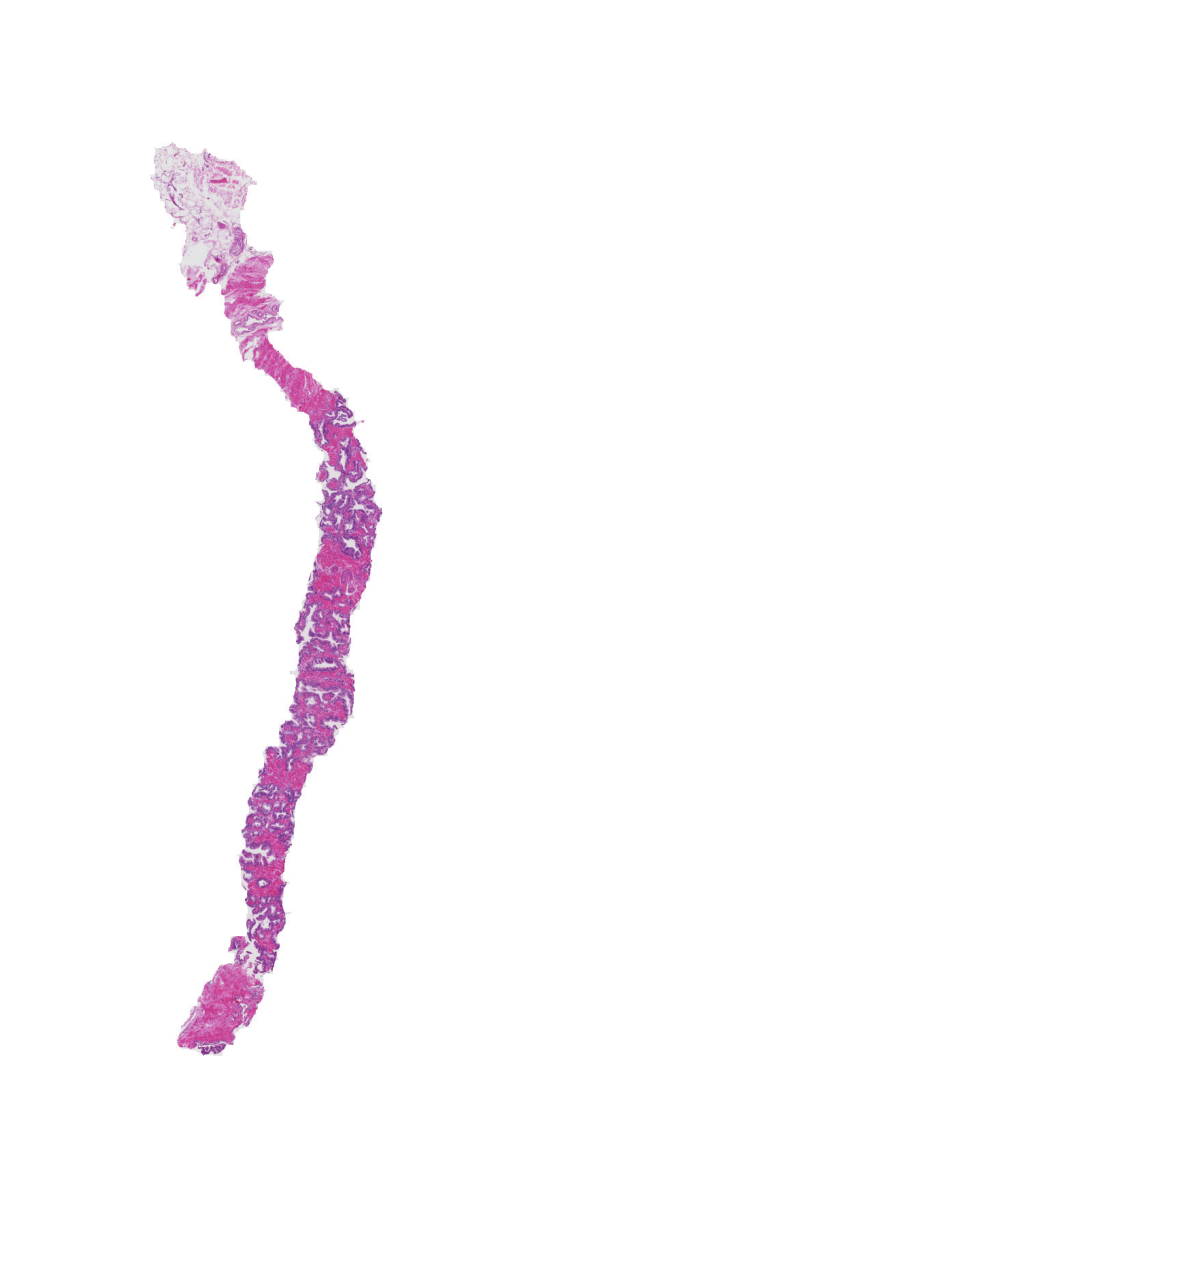

In [15]:
level = count-1
region = img.read_region(location=(0, 0), size=dimensions[level], level=level)
np_img_arr = np.asarray(region)
print("resolution", np_img_arr.shape)
visualize(region)

resolution (7360, 6912, 3)


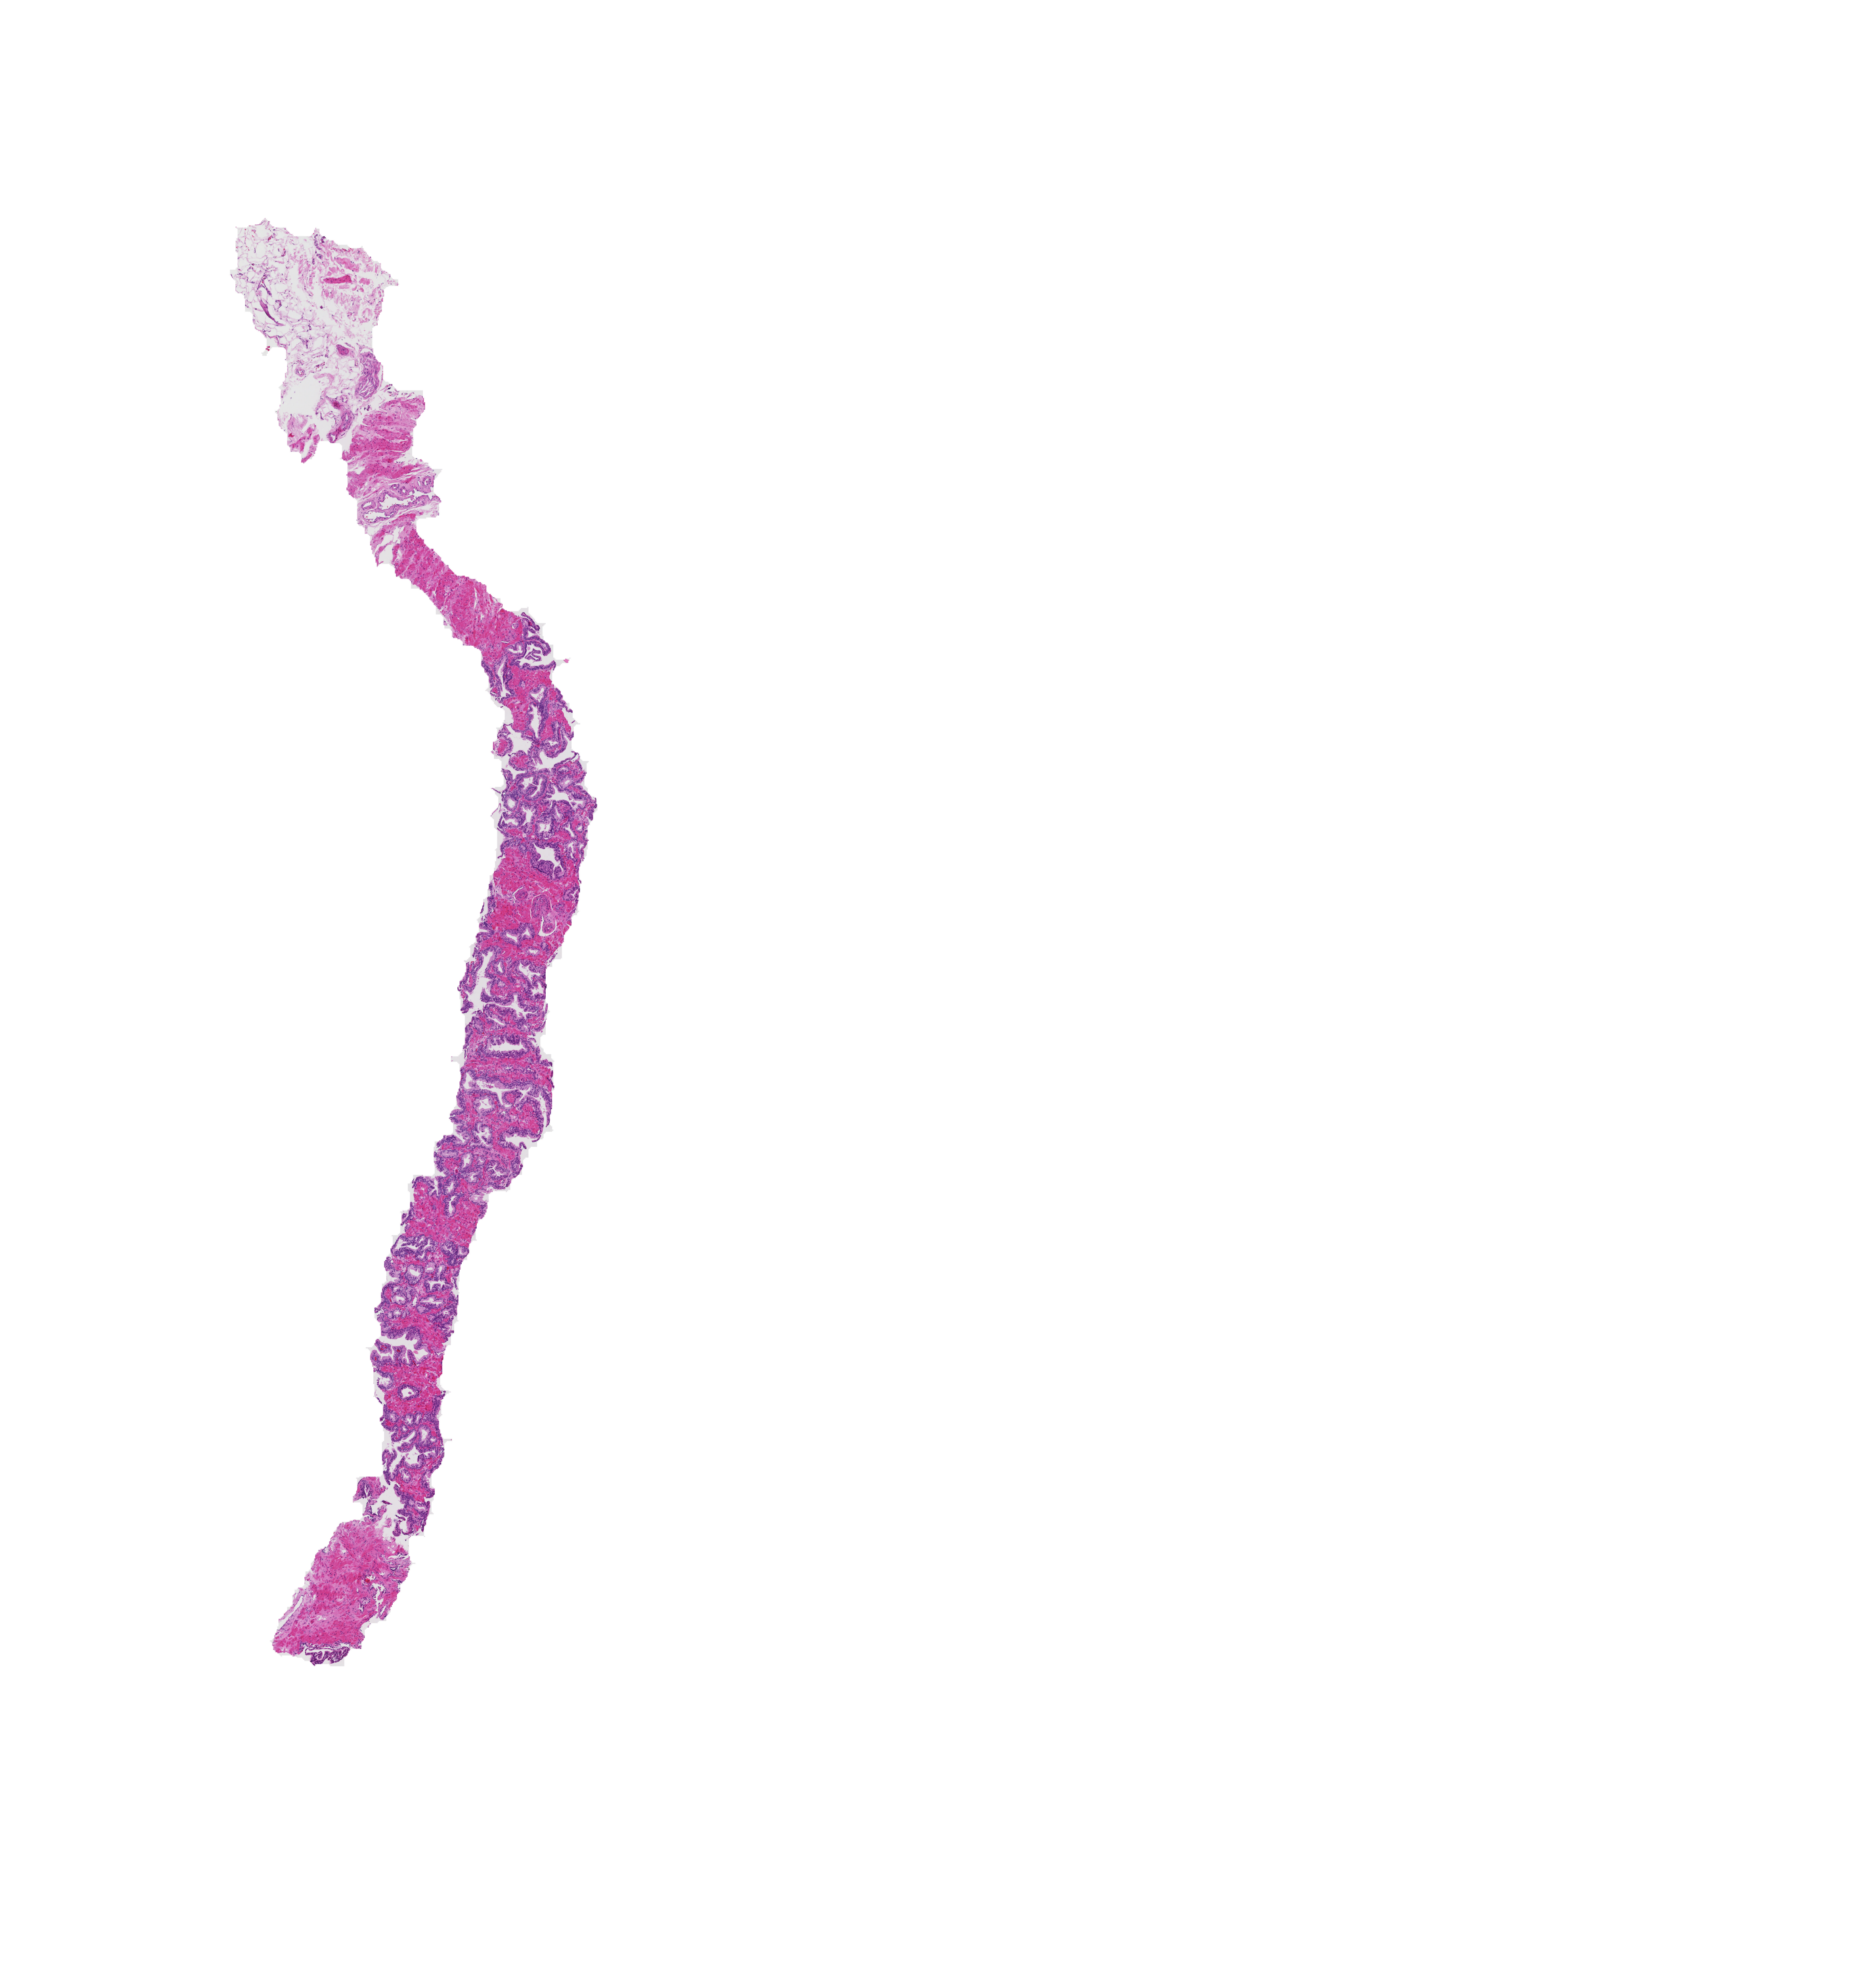

In [16]:
level = count-2
region = img.read_region(location=(0, 0), size=dimensions[level], level=level)
np_img_arr = np.asarray(region)
print("resolution", np_img_arr.shape)
visualize(region)

## Load Mask WSI 

In [17]:
mask = WSIReader(reader_lib="cuCIM").read(data=mask_file)

count = mask.resolutions['level_count']
dimensions = mask.resolutions['level_dimensions']

print(f"level_count: {count}")
print(f"level_dimensions: {dimensions}")
print(mask.metadata)

ValueError: Cannot open /tmp/datasets/train_images/0005f7aaab2800f6170c399693a96917_mask.tiff!